In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline
mpl.style.use('ggplot')

# Introduction

This dataset contains information about all the apps in Google Play Store.

In [2]:
apps=pd.read_csv('googleplaystore.csv')
user_reviews=pd.read_csv('googleplaystore_user_reviews.csv')

# Let's take a look at the data 

In [3]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
mis_data=apps.isnull()
for column in mis_data.columns.values.tolist():
    print(column)
    print(mis_data[column].value_counts())
    print("")

App
False    10841
Name: App, dtype: int64

Category
False    10841
Name: Category, dtype: int64

Rating
False    9367
True     1474
Name: Rating, dtype: int64

Reviews
False    10841
Name: Reviews, dtype: int64

Size
False    10841
Name: Size, dtype: int64

Installs
False    10841
Name: Installs, dtype: int64

Type
False    10840
True         1
Name: Type, dtype: int64

Price
False    10841
Name: Price, dtype: int64

Content Rating
False    10840
True         1
Name: Content Rating, dtype: int64

Genres
False    10841
Name: Genres, dtype: int64

Last Updated
False    10841
Name: Last Updated, dtype: int64

Current Ver
False    10833
True         8
Name: Current Ver, dtype: int64

Android Ver
False    10838
True         3
Name: Android Ver, dtype: int64



# Missing data handling

In [6]:
avg=apps["Rating"].mean(axis=0)
apps["Rating"].replace(np.nan,avg,inplace=True)

In [7]:
apps["Type"].replace(np.nan,"Free",inplace=True)

In [8]:
apps["Content Rating"].replace(np.nan,"Everyone",inplace=True)

In [9]:
mis_data1=user_reviews.isnull()
for column1 in mis_data1.columns.values.tolist():
    print(column1)
    print(mis_data1[column1].value_counts())
    print("")

App
False    64295
Name: App, dtype: int64

Translated_Review
False    37427
True     26868
Name: Translated_Review, dtype: int64

Sentiment
False    37432
True     26863
Name: Sentiment, dtype: int64

Sentiment_Polarity
False    37432
True     26863
Name: Sentiment_Polarity, dtype: int64

Sentiment_Subjectivity
False    37432
True     26863
Name: Sentiment_Subjectivity, dtype: int64



# Analysis

In [10]:
apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [11]:
#1 Top 10 Top rated apps in play store
apps.drop(index=10472,axis=1,inplace=True)
apps.reset_index(drop=True,inplace=True)

In [12]:
apps.sort_values('Rating',ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9290,EF Forms,BUSINESS,5.0,2,23M,50+,Free,0,Everyone,Business,"July 24, 2018",1.29,4.4 and up
7321,CG Jobs,FAMILY,5.0,8,14M,10+,Free,0,Everyone,Education,"August 1, 2018",1.1,4.2 and up
8159,CZ Kompas,TOOLS,5.0,2,3.5M,10+,Free,0,Everyone,Tools,"July 9, 2018",1.1,4.0 and up
4452,P-Home for KLWP,PERSONALIZATION,5.0,4,12M,100+,Paid,$0.99,Everyone,Personalization,"May 15, 2018",v2018.May.15.14,5.0 and up
9245,EC Calgary,FAMILY,5.0,6,8.1M,100+,Free,0,Teen,Education,"June 26, 2018",3.8.0,4.1 and up
9246,Victoria EC,TOOLS,5.0,5,3.8M,500+,Free,0,Everyone,Tools,"March 30, 2018",1.283.0037,2.3.3 and up
6726,COMSATS BOOK STORE FOR BS(CS),FAMILY,5.0,15,94M,50+,Free,0,Everyone,Education,"July 11, 2018",2.0,4.0.3 and up
6727,BS-Mobile,COMMUNICATION,5.0,1,683k,50+,Free,0,Everyone,Communication,"September 3, 2015",0.1,2.3 and up
9247,EC SPORTS,SPORTS,5.0,1,6.3M,10+,Free,0,Everyone,Sports,"May 26, 2015",4.1.1,2.3.3 and up
9254,EC Fairgrounds,FAMILY,5.0,3,5.5M,500+,Free,0,Everyone,Entertainment,"July 13, 2018",erie1.3.23.42-release,4.4 and up


In [15]:
#2 Top app in each category
categories=apps["Category"].unique()
top=pd.DataFrame()
for cat in categories:
    top=top.append(apps[apps["Category"]==cat].sort_values("Rating",ascending=False).head(5))
top

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,2.9M,100+,Free,0,Everyone,Art & Design,"April 18, 2018",1.0.2,4.0 and up
25,Harley Quinn wallpapers HD,ART_AND_DESIGN,4.8,192,6.0M,"10,000+",Free,0,Everyone,Art & Design,"April 25, 2018",1.5,3.0 and up
6930,Fantasy theme dark bw black building,ART_AND_DESIGN,4.8,41,1.9M,"5,000+",Free,0,Everyone,Art & Design,"March 20, 2018",1.0.2,4.0 and up
5254,AJ Styles HD Wallpapers,ART_AND_DESIGN,4.8,48,25M,"5,000+",Free,0,Everyone,Art & Design,"August 4, 2018",1.1.1,4.1 and up
4759,X Launcher Pro - IOS Style Theme & Control Center,ART_AND_DESIGN,4.8,1216,8.6M,"10,000+",Paid,$1.99,Everyone,Art & Design,"June 26, 2018",1.0.0,4.1 and up
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,27M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,33M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 18, 2018",1.7.1,4.0 and up
4120,MHD F-Series,AUTO_AND_VEHICLES,4.9,73,23M,"1,000+",Free,0,Everyone,Auto & Vehicles,"June 5, 2018",version 0.994,3.2 and up
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up


In [16]:
#3 Top rated apps used by teens
apps[apps["Content Rating"]=="Teen"].sort_values("Rating",ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9282,EF Events,EVENTS,5.0,7,4.4M,100+,Free,0,Teen,Events,"October 5, 2017",Varies with device,Varies with device
9245,EC Calgary,FAMILY,5.0,6,8.1M,100+,Free,0,Teen,Education,"June 26, 2018",3.8.0,4.1 and up
5996,Railroad Radio Vancouver BC,FAMILY,5.0,4,1.7M,100+,Free,0,Teen,Entertainment,"June 28, 2015",1,2.2 and up
6055,Movement BE,SOCIAL,5.0,20,1.2M,100+,Free,0,Teen,Social,"November 10, 2016",1.2,4.4 and up
10407,Jigsaw Volvo FH 16 Trucks,FAMILY,5.0,5,8.1M,"1,000+",Free,0,Teen,Puzzle,"December 1, 2016",1.0,4.0 and up
633,Spine- The dating app,DATING,5.0,5,9.3M,500+,Free,0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
5118,Eternal Light AG,SOCIAL,5.0,30,13M,100+,Free,0,Teen,Social,"May 19, 2018",1.04,4.0.3 and up
8591,DN Blog,SOCIAL,5.0,20,4.2M,10+,Free,0,Teen,Social,"July 23, 2018",1.0,4.0 and up
9512,Hum Ek Hain 2.02,SOCIAL,5.0,2,1.8M,10+,Free,0,Teen,Social,"March 18, 2018",1.0,5.0 and up
7100,CA Speakers,LIFESTYLE,5.0,12,1.2M,100+,Paid,$0.99,Teen,Lifestyle,"March 25, 2014",1.0,3.0 and up


In [17]:
#4 Most expensive apps in play store
apps.Price=apps.Price.str.slice(1)

In [18]:
apps.Price.replace('',"0",inplace=True)
apps.Price=apps.Price.astype('float')

In [19]:
apps.sort_values('Price',ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.600000,275,7.3M,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.800000,3547,1.8M,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5358,I am Rich!,FINANCE,3.800000,93,22M,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
4197,most expensive app (H),FAMILY,4.300000,6,1.5M,100+,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
5369,I am Rich,FINANCE,4.300000,180,3.8M,"5,000+",Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
5359,I am rich(premium),FINANCE,3.500000,472,965k,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5373,I AM RICH PRO PLUS,FINANCE,4.000000,36,41M,"1,000+",Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.193338,0,40M,0+,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
5356,I Am Rich Premium,FINANCE,4.100000,1867,4.7M,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
4362,💎 I'm rich,LIFESTYLE,3.800000,718,26M,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up


In [20]:
#5 Apps with most no. of installs in games
apps["Install_int"]=apps["Installs"].str.replace(',','',regex=True)
apps["Install_int"]=apps["Install_int"].str.replace('+','',regex=True)


In [21]:
apps["Install_int"]=apps['Install_int'].astype('int')

In [22]:
top_games=apps[apps["Category"]=="GAME"].sort_values("Install_int",ascending=False)

In [23]:
top_games.drop_duplicates("App",keep='first').head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Install_int
1750,Subway Surfers,GAME,4.5,27724094,76M,"1,000,000,000+",Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1000000000
1886,Temple Run 2,GAME,4.3,8119151,62M,"500,000,000+",Free,0.0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up,500000000
1705,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,500000000
1702,Pou,GAME,4.3,10485334,24M,"500,000,000+",Free,0.0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up,500000000
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,"500,000,000+",Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up,500000000
1921,slither.io,GAME,4.4,5235294,Varies with device,"100,000,000+",Free,0.0,Everyone,Action,"November 14, 2017",Varies with device,2.3 and up,100000000
1923,Talking Tom Gold Run,GAME,4.6,2698889,78M,"100,000,000+",Free,0.0,Everyone,Action,"July 31, 2018",2.8.2.59,4.1 and up,100000000
1925,Sniper 3D Gun Shooter: Free Shooting Games - FPS,GAME,4.6,7674252,Varies with device,"100,000,000+",Free,0.0,Mature 17+,Action,"August 2, 2018",Varies with device,Varies with device,100000000
1773,Extreme Car Driving Simulator,GAME,4.3,2251012,52M,"100,000,000+",Free,0.0,Everyone,Racing,"May 3, 2018",4.17.2,4.0 and up,100000000
1919,Crossy Road,GAME,4.5,4230886,60M,"100,000,000+",Free,0.0,Everyone,Action,"August 1, 2018",3.1.0,5.0 and up,100000000


In [24]:
apps.corr()

,Rating,Price,Install_int
Rating,1.000000,-0.020178,0.051139
Price,-0.020178,1.000000,-0.011689
Install_int,0.051139,-0.011689,1.000000


In [25]:
user_reviews.dropna(subset=user_reviews.columns,axis=0,inplace=True)
user_reviews.reset_index(drop=True,inplace=True)

In [26]:
user_reviews.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
37426,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


In [27]:
#1 Finding a good app(just by counting sentiments)

In [28]:
#1 
sentiment=user_reviews.groupby(["App",'Sentiment'],as_index=False)["Translated_Review"].agg('count')
sentiment2=user_reviews.groupby('App',as_index=False)['Sentiment'].agg('count')
sentiment3=sentiment[sentiment["Sentiment"]=='Positive']
sentiment3.reset_index(inplace=True)

In [29]:
sentiment2.set_index('App',inplace=True)

In [30]:
sentiment3.set_index('App',inplace=True)

In [31]:
sentiment.set_index('App',inplace=True)

In [32]:
sentiment2=sentiment2.merge(sentiment3,on='App')

In [33]:
sentiment2[(sentiment2['Translated_Review']>=0.8*sentiment2['Sentiment_x'])&(sentiment2["Translated_Review"]>=50)]

,Sentiment_x,index,Sentiment_y,Translated_Review
App,,,,
10 Best Foods for You,194,2,Positive,162
1800 Contacts - Lens Store,80,11,Positive,64
21-Day Meditation Experience,80,20,Positive,68
8fit Workouts & Meal Planner,171,63,Positive,137
Ada - Your Health Guide,63,176,Positive,54
Aprender inglés con Wlingua,56,369,Positive,53
Bible,97,639,Positive,81
"Calm - Meditate, Sleep, Relax",65,890,Positive,56
Calorie Counter & Diet Tracker,135,893,Positive,109


In [34]:
#1 Heatmap between Rating, Reviews, Size, Installs, Price


C:\Users\The WonderlanD\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\The WonderlanD\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\The WonderlanD\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

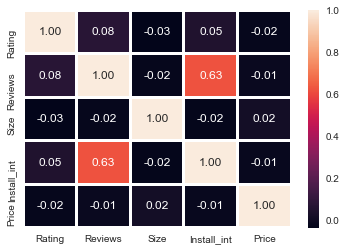

In [38]:
import seaborn as sns
size_int=apps[apps['Size']!='Varies with device']
size_int['Size']=size_int['Size'].str.replace('M','')
size_int['Size']=size_int['Size'].str.replace('k','000')
size_int['Size']=size_int['Size'].astype('float')
size_int['Reviews']=size_int['Reviews'].astype('int')
sns.set(style='white',font_scale=1)
sns.heatmap(size_int.dropna()[['Rating','Reviews','Size','Install_int','Price']].corr(),fmt='.2f',annot=True,linewidth=2)



In [ ]:
# Data visualizaztion from above heatmap
#1 First, Rating is highly correlated(logical)
#2 It should be noted that Rating does not depend upon Price of the app
#3 Reviews do not depend upon size of the app
#4 Reviews are highly dependent on installs(logical)...on the contrary it might be that installs is dependent on reviews
#5 Reviews do not depend on price